# AAAI会议论文聚类分析
---
## 一.案例介绍
每年国际上召开的大大小小学术会议不计其数，发表了非常多的论文。在计算机领域的一些大型学术会议上，一次就可以发表涉及各个方向的几百篇论文。  
按论文的主题、内容进行聚类，有助于人们高效地查找和获得所需要的论文。  
本案例数据来源于AAAI 2014上发表的约400篇文章，由[UCI](https://archive.ics.uci.edu/ml/datasets/AAAI+2014+Accepted+Papers!)公开提供，提供包括标题、作者、关键词、摘要在内的信息，  
根据这些信息，合理构造特征向量来表示这些论文，并设计实现或调用聚类算法对论文进行聚类。  
最后也可以对聚类结果进行观察，看每一类都是什么样的论文，是否有一些主题。


In [1]:
import pandas as pd
import numpy as np

## 二.数据概览
***AAAI会议论文***
- ***Title*** 题目📌
- ***Authors*** 作者✍️
- ***Groups*** 组别🗃️
- ***Keywords*** 关键词🗝️
- ***Topics*** 主题🏷️
- ***Abstract*** 摘要📑  

📢 注：*groups* 和 *topics* 也不能完全算是标签，因为
1. 有些文章作者投稿时可能会选择某个 *group/topic* 但实际和另外的 *group/topic* 也相关甚至更相关；
2. 一篇文章可能有多个 *groups* 和 *topics* ，作为标签会出现有的文章同属多个类别，这里暂不考虑这样的聚类；
3. *groups* 和 *topics* 的取值很多，但聚类常常希望指定聚合成出例如 *5/10/20* 类；
4. 可以思考利用 *groups* 和 *topics* 信息来量化评价无监督聚类结果。

##### 🔰导入数据
- **数据集**："./data/" 📂路径下 *[UCI] AAAI-14 Accepted Papers - Papers.csv* 📝文件  
  包含总共 ***398*** 条数据样本💾  
  每条样本包含 ***6*** 个特征🌵：  
  - *title，authors，groups，keywords，topics，abstract*

✔️⚙️借助 ***pandas*** 读入标准 *csv* 格式文件的函数 `read_csv()` 将数据转换为 `DataFrame` 的形式。  

In [2]:
data_df = pd.read_csv('./data/[UCI] AAAI-14 Accepted Papers - Papers.csv') # 读入 csv 文件为 pandas 的 DataFrame
data_df.head(3) # 显示前三条数据

,title,authors,groups,keywords,topics,abstract
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...


In [3]:
data_df.info() # 显示数据基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     398 non-null    object
 1   authors   398 non-null    object
 2   groups    396 non-null    object
 3   keywords  398 non-null    object
 4   topics    394 non-null    object
 5   abstract  398 non-null    object
dtypes: object(6)
memory usage: 18.8+ KB


In [4]:
data_df.describe() # 显示数据统计摘要

,title,authors,groups,keywords,topics,abstract
count,398,398,396,398,394,398
unique,398,391,125,398,350,398
top,Kernelized Bayesian Transfer Learning,"Deguang Kong, Chris Ding and Qihe Pan",Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,GTEP: Social Choice / Voting,Transfer learning considers related but distin...
freq,1,3,50,1,7,1


##### 🔬数据预处理
- 🥽检查数据是否有丢失 ***(NaN)***
  - ⚠️***Groups***
    - *Index*: ***211***,***340***❗❗❗
  - ⚠️***Topics***
    - *Index*: ***344***,***364***,***365***,***388***❗❗❗

📣 *groups* 存在 ***2*** 条样本数据丢失  
📣 *topics* 存在 ***4*** 条样本数据丢失

✔️🛠️**将丢失数据替换为 `' '` 空格字符**

In [5]:
# 检查数据是否有丢失(NaN)
fts=data_df.columns.values.tolist()
for ft in fts:
    for i,item in enumerate(data_df[ft]):
        if pd.isnull(item):
            print('数据丢失(NaN)\n>>>feature:%s,index:%d'%(ft,i))
            data_df[ft][i]=' ' # 将丢失的数据替换为 ' ' 空格字符

数据丢失(NaN)
>>>feature:groups,index:211
数据丢失(NaN)
>>>feature:groups,index:340
数据丢失(NaN)
>>>feature:topics,index:344
数据丢失(NaN)
>>>feature:topics,index:364
数据丢失(NaN)
>>>feature:topics,index:365
数据丢失(NaN)
>>>feature:topics,index:388


- 📦整合数据  
  合并特征，整合为完整的 *paper* 基本信息

✔️⚙️借助 ***pandas*** *DataFrame* 列合并(+)，创建新的列 `paper`  
⭕注：列合并操作(str+str)连接没有空格，需要额外添加空格进行分词


In [6]:
# 合并特征,整合为完整的paper信息
data_df['sp']=[' ' for x in range(data_df.shape[0])] # 合并需要+空格
data_df['paper']=data_df['title']+data_df['sp']\
                +data_df['authors']+data_df['sp']\
                +data_df['groups']+data_df['sp']\
                +data_df['keywords']+data_df['sp']\
                +data_df['topics']+data_df['sp']\
                +data_df['abstract']+data_df['sp']
data_df.paper

0      Kernelized Bayesian Transfer Learning Mehmet G...
1      "Source Free" Transfer Learning for Text Class...
2      A Generalization of Probabilistic Serial to Ra...
3      Lifetime Lexical Variation in Social Media Lia...
4      Hybrid Singular Value Thresholding for Tensor ...
                             ...                        
393    Mapping Users Across Networks by Manifold Alig...
394    Compact Aspect Embedding For Diversified Query...
395    Contraction and Revision over DL-Lite TBoxes Z...
396    Zero Pronoun Resolution as Ranking Chen Chen a...
397    Supervised Transfer Sparse Coding Maruan Al-Sh...
Name: paper, Length: 398, dtype: object

## 三.文本向量化
#### 🧰***sklearn*** 文本向量化工具  
- [***sklearn.feature_extraction.text.CountVectorizer***](https://github.com/xfkcode/MachineLearning/blob/main/python%E5%B7%A5%E5%85%B7/sklearn/sklearn%E5%AD%A6%E4%B9%A0%E7%AC%94%E8%AE%B01.ipynb)  
  将文本文档集合转换为计数矩阵。
- [***sklearn.feature_extraction.text.TfidfVectorizer***](https://github.com/xfkcode/MachineLearning/blob/main/python%E5%B7%A5%E5%85%B7/sklearn/sklearn%E5%AD%A6%E4%B9%A0%E7%AC%94%E8%AE%B02.ipynb)  
  将文档集合转换为TF-IDF功能矩阵。  
  
  🎪***TF-TDF***  
  (*Term Frequency-Inverse Document Frequency*, 词频-逆文本频率)  
  一个词语在一篇文章中出现次数越多, 同时在所有文档中出现次数越少, 越能够代表该文章  
  📌$TF-IDF(x)=TF(x)*IDF(x)$📌
  - ***TF***  
  $TF(x)=\frac{Number\,of\,the\,term\,appears\,in\,the\,doc}{Total\,number\,of\,words\,in\,the\,doc}$
  - ***IDF***  
  $IDF(x)=\log{\frac{N}{N(x)}}$  
  $N$ 代表语料库中文本的总数，而 $N(x)$ 代表语料库中包含词xx的文本总数
  - **平滑** ***IDF***  
  $IDF(x)=\log{\frac{N+1}{N(x)+1}}+1$


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
# max_df=0.9表示过滤一些在90%的文档中都出现过的词，min_df=10表示在所有文档中出现低于10次的词。
vectorizer1 = CountVectorizer(max_df=0.9, min_df=10)
X1 = vectorizer1.fit_transform(data_df.paper)
vectorizer1.get_feature_names_out()[:21:1]

array(['ability', 'able', 'about', 'according', 'account', 'accuracy',
       'accurate', 'accurately', 'achieve', 'achieves', 'acquisition',
       'across', 'action', 'actions', 'active', 'activities',
       'adaptation', 'adaptive', 'addition', 'additional', 'address'],
      dtype=object)

In [9]:
print(X1.toarray()[0])
print(X1.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 3 0 1 0 0 0 0 0
 0 0 0 0 0 2 1 0 0 0 1 0 1 0 0 0 0 0 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 6 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 3 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 3 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 0 2 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 2 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 

In [10]:
# max_df=0.9表示过滤一些在90%的文档中都出现过的词，min_df=10表示在所有文档中出现低于10次的词。
vectorizer2 = TfidfVectorizer(max_df=0.9, min_df=10)
X2 = vectorizer2.fit_transform(data_df.paper)
vectorizer2.get_feature_names_out()[:21:1]

array(['ability', 'able', 'about', 'according', 'account', 'accuracy',
       'accurate', 'accurately', 'achieve', 'achieves', 'acquisition',
       'across', 'action', 'actions', 'active', 'activities',
       'adaptation', 'adaptive', 'addition', 'additional', 'address'],
      dtype=object)

In [11]:
print(X2.toarray()[0])
print(X2.shape)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.20769004 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.03586118 0.08975815
 0.         0.04541673 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.15006481 0.02657644 0.         0.         0.         0.05159483
 0.         0.03352141 0.         0.         0.         0.
 0.         0.12697073 0.02471558 0.04261577 0.02650089 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.02867161 0.18841595
 0.02991938 0.         0.         0.         0.         0.
 0.         0.         0.         0.06348537 0.         0.
 0.         0.         0.04322161 0.         0.07648192 0.
 0.         0.         0.         0.         0.04385032 0.
 0.         0.         0.0290186

## 四.模型构建
#### 🧰***sklearn***实现，***sklearn.cluster.KMeans***  
```python
class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, 
tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
```
- ***n_clusters:int, default=8***  
  聚类簇数 *(The number of clusters)*
- ***init:{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’***  
  初始化方法 *(Method for initialization)*
  - `k-mearns++`基于对总惯性贡献点的经验概率分布，使用采样选择初始簇质心。  
  这种技术加快了收敛速度，理论上证明是 $O(\log{k})$ 最优的。
  - `random`从初始质心的数据中随机选择n个聚类观测值。
- ***n_init:int, default=10***  
  *K-means Algorithm* 运行次数
- ***max_iter:int, default=300***  
  最大迭代次数
- ***tol:float, default=1e-4***
- ***verbose:int, default=0***  
  详细模式
- ***random_state:int, RandomState instance or None, default=None***  
  确定质心初始化的随机数生成。使用int使随机性具有确定性。
- ***copy_x:bool, default=True***  
  `True`（默认值），不会修改原始数据。  
  `False`，原始数据将被修改。
- ***algorithm:{“lloyd”, “elkan”, “auto”, “full”}, default=”lloyd”***  
  经典的EM-style算法是 `lloyd`。  
  通过使用三角形不等式，`elkan` 变量可以在某些具有定义良好的聚类的数据集上更有效。  
  然而，由于分配了一个额外的数组（n_samples，n_clusters），它会占用更多的内存。

In [12]:
from sklearn.cluster import KMeans
'''
函数说明: K-means sklearn模型构建
Parameters: 
    X - 聚类数据
    clu - 聚类簇数
Returns:
    y_pred - 聚类结果
'''
def kmeansTest(X,clu):
    k_means = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=clu, n_init=10, random_state=None, tol=0.0001, verbose=0)
    k_means.fit(X)
    y_pred = k_means.predict(X)
    return y_pred

In [13]:
y_pred_dict={} # 聚类结果字典数据
clu_range=range(5,14)
for clu in clu_range:
    y_pred_dict[clu]=kmeansTest(X1,clu)
print(y_pred_dict[5]) # 显示clu=5的聚类结果

[0 0 3 2 2 2 2 0 2 0 1 2 2 2 1 2 3 2 0 2 2 4 2 2 1 2 2 1 0 2 3 1 2 0 3 4 0
 3 0 3 0 4 0 2 3 4 0 2 2 1 2 2 2 2 0 2 4 3 2 2 3 2 2 0 2 3 4 3 2 4 3 4 0 2
 2 2 4 3 2 3 2 2 0 2 2 2 0 2 0 0 0 2 1 2 0 1 2 3 2 2 4 2 2 2 4 1 3 1 0 4 3
 1 2 4 2 2 2 3 0 2 2 2 0 1 3 0 2 1 0 4 2 4 0 2 3 3 2 0 1 2 4 2 2 2 0 2 1 2
 1 3 2 2 1 1 0 1 2 1 0 2 0 3 4 0 1 2 3 2 1 2 4 3 1 4 4 0 0 1 3 4 4 3 2 2 4
 1 2 1 3 3 3 3 1 0 0 4 1 3 2 0 2 1 2 2 2 4 1 2 0 4 0 0 4 2 2 2 1 0 1 2 2 0
 2 2 3 2 2 2 2 0 4 2 0 3 2 1 2 1 2 2 2 2 2 0 2 2 2 1 2 2 1 0 3 2 0 2 1 2 2
 0 0 3 2 2 0 3 1 0 2 2 3 0 3 2 2 2 2 1 2 4 0 1 2 1 2 0 2 4 0 2 2 4 1 2 4 3
 2 2 0 0 2 2 2 3 3 0 2 3 4 0 2 4 1 3 1 1 2 3 0 2 3 4 2 2 4 3 4 2 0 0 2 0 0
 2 1 0 3 3 2 0 4 1 3 3 2 1 1 3 4 2 0 2 4 2 4 0 4 1 4 3 2 2 2 2 2 0 3 2 2 2
 3 1 0 0 4 2 2 1 0 2 3 2 0 4 2 2 2 1 2 1 3 1 0 2 2 4 2 0]


## 五.可视化
#### 🧰***sklearn*** 数据降维工具  
- [***sklearn.decomposition.PCA***](https://github.com/xfkcode/MachineLearning/blob/main/python%E5%B7%A5%E5%85%B7/sklearn/sklearn%E5%AD%A6%E4%B9%A0%E7%AC%94%E8%AE%B03.ipynb)  
  主成分分析法（PCA）  
  
  🎪***PCA***  
  将关系紧密的变量变成尽可能少的新变量，使这些新变量是两两不相关的，  
  即用较少的综合指标分别代表存在于各个变量中的各类信息，达到数据降维的效果。  
  - 🎯映射：将n维特征映射到k维上，这k维是全新的正交特征也被称为主成分，  
  是在原有n维特征的基础上重新构造出来的k维特征。我们要选择的就是让映射后样本间距最大的轴。  
  - 🧠过程：
    1. 样本归0
    2. 找到样本点映射后方差最大的单位向量 $\omega$  
   求 $\omega$ ,使得 $Var(X_{project})=\frac{1}{m} \sum_{i=1}^{m}{(X^{(i)}\cdot\omega)^2}$ 最大

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

##### 🌠**降维>>>2维**
✔️⚙️借助 ***PCA*** 实现数据降维至两维

In [15]:
pca = PCA(n_components=2)
X1_pca2 = pca.fit_transform(X1.toarray())
X1_pca2.shape

(398, 2)

##### 🐞***Clusters=5>>>13***
***K-meanns Algorithm*** 实现聚类，对比不同簇数聚类结果  
  
✔️⚙️借助 ***scatter2D*** 可视化聚类结果

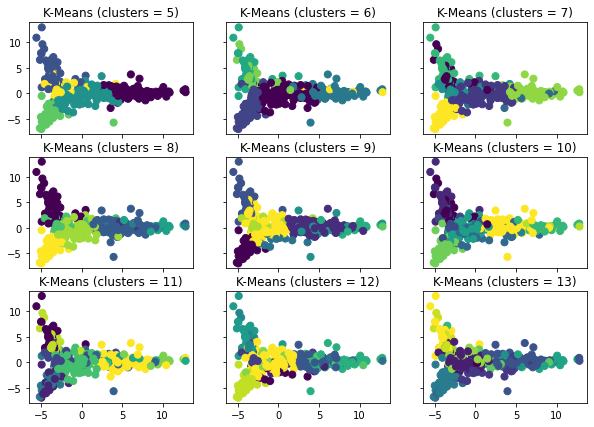

In [16]:
'''
函数说明:2D散点图
Parameters:
    X_2D - 二维数据
    clu - cluster簇的数量
    row - 子图行
    col - 子图列
Returns: None
'''
def scatter2D(X_2D,clu,row,col):
    axs[row,col].scatter(X_2D[:, 0], X_2D[:, 1], c=y_pred_dict[clu], s=50, cmap='viridis')
    axs[row,col].set_title("K-Means (clusters = %d)"%clu)

clu=5
ROW=3;COL=3
fig,axs = plt.subplots(ROW,COL,sharex=True,sharey=True,figsize=(10, 7))
for row in range(ROW):
    for col in range(COL):
        scatter2D(X1_pca2,clu,row,col)
        clu += 1
plt.show()

##### 🌠**降维>>>3维**
✔️⚙️借助 ***PCA*** 实现数据降维至三维

In [17]:
Pca = PCA(n_components=3)
X1_pca3=Pca.fit_transform(X1.toarray())
X1_pca3.shape

(398, 3)

##### 🐞***Clusters=5>>>13***
***K-meanns Algorithm*** 实现聚类，对比不同簇数聚类结果  
  
✔️⚙️借助 ***scatter3D*** 可视化聚类结果

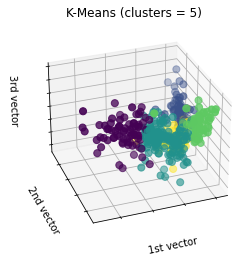

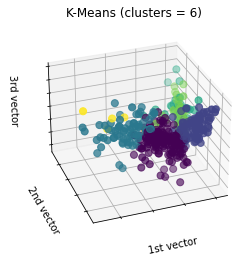

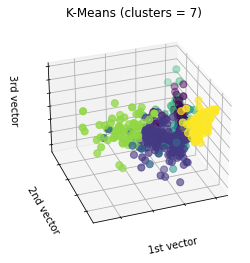

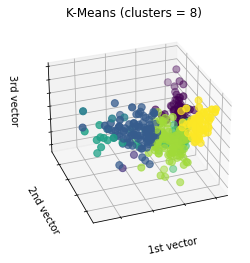

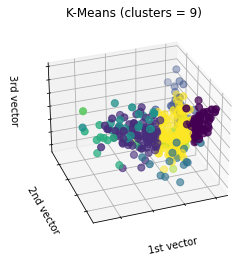

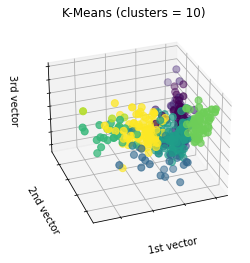

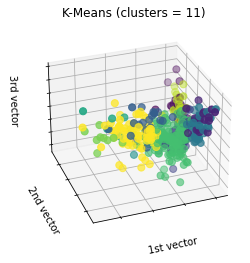

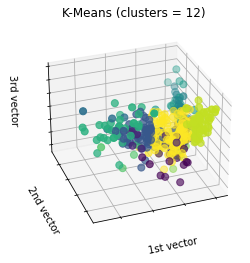

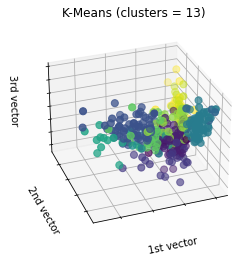

In [18]:
'''
函数说明:3D散点图
Parameters:
    X_3D - 三维数据
    clu - cluster簇的数量
Returns: None
'''
def scatter3D(X_3D,clu):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
    ax.scatter(X_3D[:, 0],X_3D[:, 1],X_3D[:, 2],
               c=y_pred_dict[clu],cmap='viridis',s=50,)
    
    ax.set_title("K-Means (clusters = %d)"%(clu))
    ax.set_xlabel("1st vector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd vector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd vector")
    ax.w_zaxis.set_ticklabels([])
    plt.show()

for clu in clu_range:
    scatter3D(X1_pca3,clu)
    